In [2]:
library(stringr)
library(arules)
library(arulesViz)
library(mvinfluence)
library(MASS)
library(caret)

In [3]:
groceries_data <- read.csv("groceries.csv")

str(groceries_data)

'data.frame':	15295 obs. of  4 variables:
 $ citrus.fruit       : chr  "tropical fruit" "whole milk" "pip fruit" "other vegetables" ...
 $ semi.finished.bread: chr  "yogurt" "" "yogurt" "whole milk" ...
 $ margarine          : chr  "coffee" "" "cream cheese " "condensed milk" ...
 $ ready.soups        : chr  "" "" "meat spreads" "long life bakery product" ...


Warning message:
“Column(s) 1, 2, 3, 4 not logical or factor. Applying default discretization (see '? discretizeDF').”


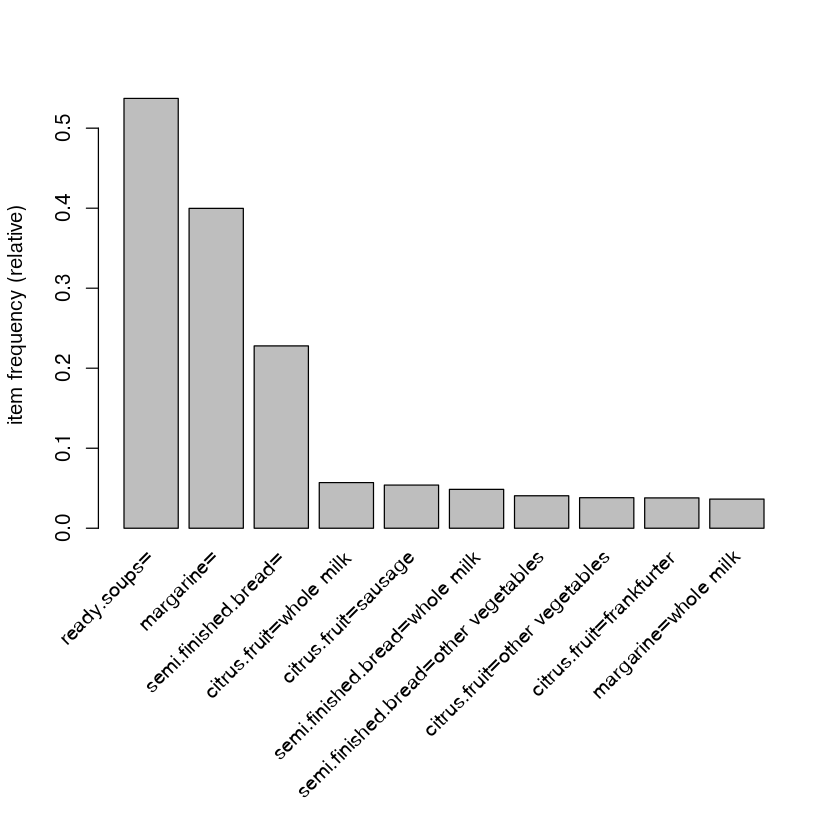

In [4]:
groceries <- as(groceries_data, "transactions")

itemFrequencyPlot(groceries, topN=10)

In [5]:
grocires_apriori <- apriori(groceries, parameter = list(supp=0.03, conf=0.4, minlen=2, maxlen=4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 458 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[655 item(s), 15295 transaction(s)] done [0.01s].
sorting and recoding items ... [15 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [6]:
grocires_apriori

set of 10 rules 

In [7]:
inspect(grocires_apriori)

     lhs                                    rhs                    support   
[1]  {citrus.fruit=soda}                 => {ready.soups=}         0.03059823
[2]  {semi.finished.bread=}              => {margarine=}           0.22785224
[3]  {margarine=}                        => {semi.finished.bread=} 0.22785224
[4]  {semi.finished.bread=}              => {ready.soups=}         0.22785224
[5]  {ready.soups=}                      => {semi.finished.bread=} 0.22785224
[6]  {margarine=}                        => {ready.soups=}         0.39980386
[7]  {ready.soups=}                      => {margarine=}           0.39980386
[8]  {semi.finished.bread=,margarine=}   => {ready.soups=}         0.22785224
[9]  {semi.finished.bread=,ready.soups=} => {margarine=}           0.22785224
[10] {margarine=,ready.soups=}           => {semi.finished.bread=} 0.22785224
     confidence coverage   lift     count
[1]  0.8509091  0.03595946 1.583869  468 
[2]  1.0000000  0.22785224 2.501226 3485 
[3]  0.5699101  

In [8]:
write(grocires_apriori,
      file = "rules.csv",
      sep = ",",
      quote = TRUE,
      row.names = FALSE)

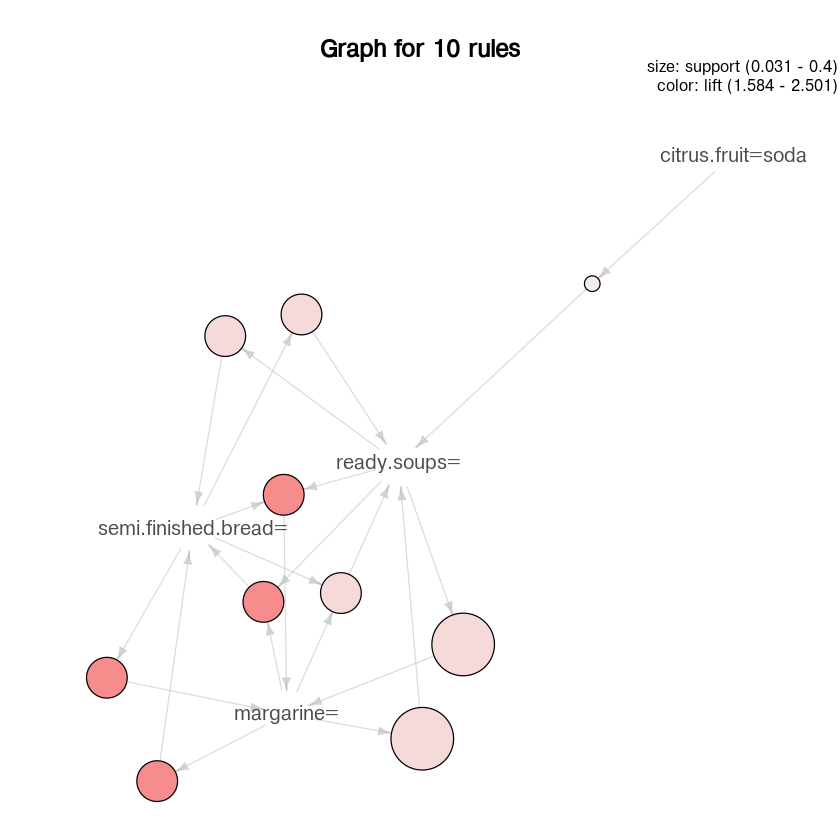

In [9]:
plot(grocires_apriori, method="graph", control=list())

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



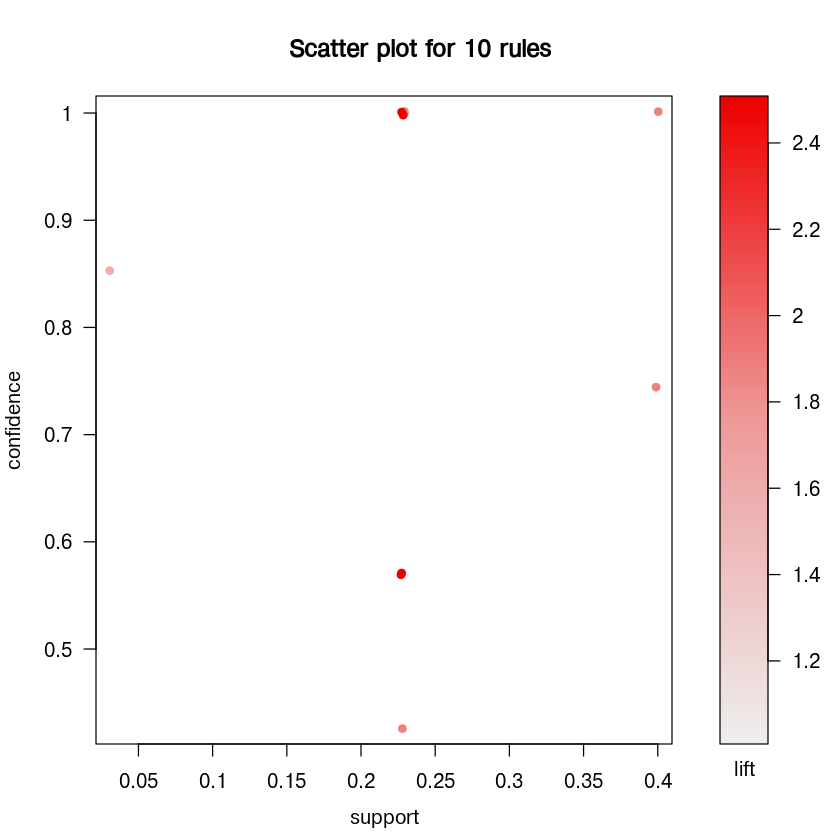

In [10]:
plot(grocires_apriori)

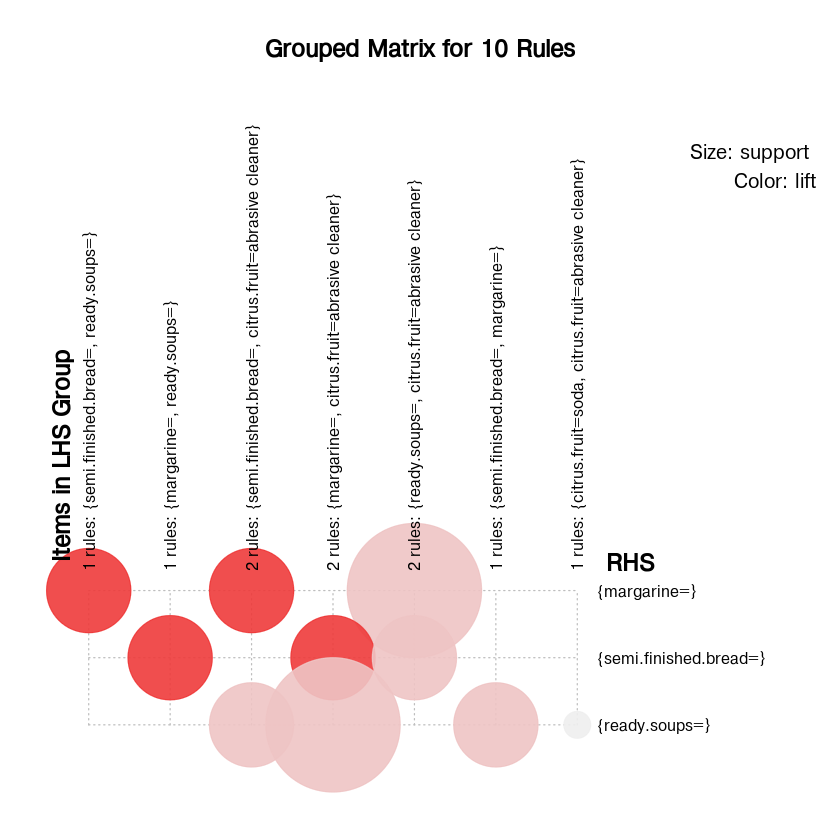

In [11]:
plot(grocires_apriori, method="grouped", control=list())